## 手書き数字画像の分類

### 
手書き数字画像を、ニューラルネットワークを用いて**分類**する. 
出力層にはシグモイド関数を使用し、ある数字が対象クラスかを判別



#### 使用データ
- 特徴量：400次元（20×20画素画像を1次元に変換）
- 使用枚数：10000枚（学習用に一部抽出）


---


## ２値分類

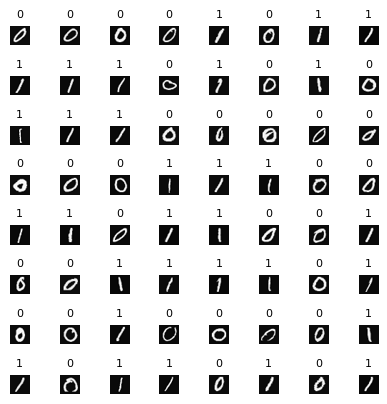

1/1 [==============================] - 0s 65ms/step
predicting a zero: [[0.02047877]]
prediction after threshold: 0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging

%matplotlib inline
#TensorFlowが出すログ（INFO や WARNING）をけす
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

X = np.load("data/X.npy")
y = np.load("data/y.npy")
X = X[0:1000]
y = y[0:1000]

# The shape of X is: (1000, 400)
# The shape of y is: (1000, 1)

m, n = X.shape

# 各画像を表示
n_rows, n_cols = 8, 8
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4, 4))
axes = np.array(axes).reshape(-1)  # 2次元(8,8) → 1次元(64,)

fig.tight_layout(pad=0.1)  # 各画像の間の余白を調整

for i, ax in enumerate(axes):  # 64回ループ
    random_index = np.random.randint(m)  # 0からm-1のランダムな整数を取得
    X_reshaped = X[random_index].reshape((20, 20)).T  # 1次元ベクトル → 20x20画像（転置して縦横調整）

    ax.imshow(X_reshaped, cmap='gray')  # グレースケールで表示
    ax.set_title(str(y[random_index, 0]), fontsize=8)
    ax.set_axis_off()  # 枠や目盛りを非表示に

plt.show()

# ニューラルネットワークモデルの構築 
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),               # 入力層：特徴量400次元
        Dense(25, activation='sigmoid'),            # 1層目：ノード数25、活性化関数はシグモイド
        Dense(15, activation='sigmoid'),            # 2層目：ノード数15、活性化関数はシグモイド
        Dense(1, activation='sigmoid')              # 出力層：ノード数1、活性化関数はシグモイド（二値分類）
    ],
    name="my_model"
)

# model.summary()  # モデル全体の層構造とパラメータ数を表示
# 重み行列 W のshapeは (入力ノード数, 出力ノード数)
# Examine Weights shapes
# [layer1, layer2, layer3] = model.layers
# W1, b1 = layer1.get_weights()
# W2, b2 = layer2.get_weights()
# W3, b3 = layer3.get_weights()
# print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
# print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
# print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
# print(model.layers[2].weights)

# モデルのコンパイル
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),        # バイナリクロスエントロピー損失関数（二値分類）
    optimizer=tf.keras.optimizers.Adam(0.001),        # Adam最適化（学習率0.001）
)

# モデルの学習 
model.fit(
    X, y,
    epochs=20,
    verbose = 0
)

# 予測の実行
prediction = model.predict(X[0].reshape(1, 400))  # X[0]（400次元）→ バッチサイズ1の2次元配列に変換
print(f"predicting a zero: {prediction}")

# しきい値による分類
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")


## 多クラス分類

---

### ソフトマックス関数
一番大きいスコアに一番高い確率が割り当てられる関数
$$
\hat{y}_j = \frac{e^{z_j}}{\sum_{k} e^{z_k}}
$$

全部足すと1になるから、分類のような判断ができる

---

### 交差エントロピー損失

正解クラスに高い確率を出せてると損失が小さくなる  

$$
L = - \sum_i y_i \log(\hat{y}_i)
$$





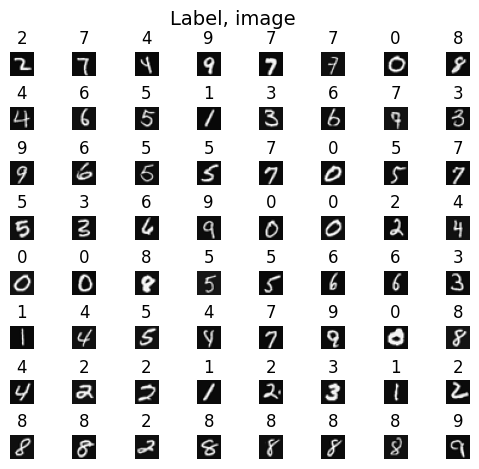

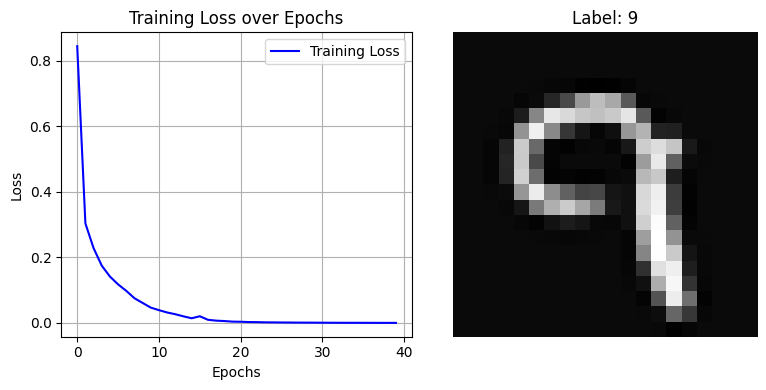

1/1 [==============================] - 0s 57ms/step
 prediction (logits): 
[[ 19.26481   -10.787691   -1.3095545  -6.644586  -28.215233    5.3508353
   -2.2450202 -11.220252  -10.363091    1.8613138]]
 Predicted class (argmax): 0
 prediction (probabilities): 
[[9.9999905e-01 8.8789978e-14 1.1605561e-09 5.5935998e-12 2.3970638e-21
  9.0622729e-07 4.5540616e-10 5.7611014e-14 1.3575781e-13 2.7653964e-08]]
 yhat (after softmax): 0
Total probability sum: 1.000
1/1 [==============================] - 0s 22ms/step


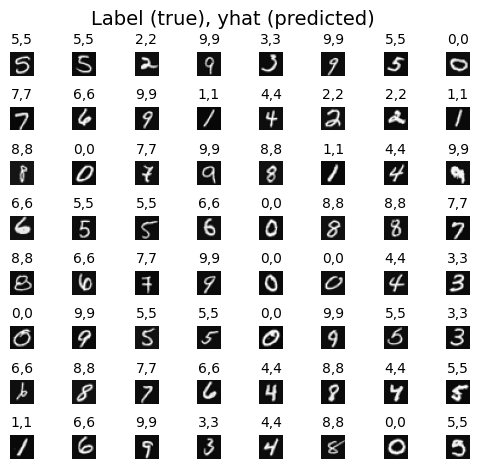

In [10]:
# データの読み込みと前処理 
X = np.load("data/X1.npy")  # 入力画像（flattenされたベクトル）
y = np.load("data/y1.npy")  # ラベル（0〜9の数字）

m, n = X.shape  # m: サンプル数, n: 特徴量数（20x20=400）

# 入力画像のサンプル表示（8x8枚）
fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])  # 余白設定

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)  # ランダムなインデックスを選択
    X_random_reshaped = X[random_index].reshape((20, 20)).T  # 1次元 → 画像(2D)
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index, 0])  # 正解ラベルをタイトルに表示
    ax.set_axis_off()  # 目盛り・枠を非表示
fig.suptitle("Label, image", fontsize=14)  # 上部タイトル表示


# モデル構築 
tf.random.set_seed(1234)  # 乱数固定（再現性の確保）

model = Sequential(
    [  
        Dense(128, activation='relu', input_shape=(400,)),  # 入力層：400→128（活性化ReLU）
        Dense(64, activation='relu'),                        # 隠れ層：128→64
        Dense(10, activation='linear')                       # 出力層：64→10（logitsのまま出力）
    ],
    name="my_model"
)

# モデルのコンパイル 
model.compile(
    # 多クラス分類の損失関数（ラベルは整数、出力はlogits）
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    # 最適化手法（Adam）：学習率は0.001（デフォルト）
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

# モデルの学習 
history = model.fit(
    X, y,
    epochs=40,
    verbose=0
)

# 損失の推移と画像表示 
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 横並び（損失＋画像）

# 左：損失グラフ
axs[0].plot(history.history['loss'], label='Training Loss', color='blue')
axs[0].set_title('Training Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# 右：ランダムに選んだ画像とラベル
image_of_two = X[random_index].reshape((20, 20)).T
axs[1].imshow(image_of_two, cmap='gray')
axs[1].set_title(f"Label: {y[random_index, 0]}")
axs[1].axis('off')

plt.tight_layout()
plt.show()


# 単一画像での予測結果確認 
random_index = np.random.randint(m)
image_of_two = X[random_index]

prediction = model.predict(image_of_two.reshape(1, 400))  # 1枚だけ予測（shape: (1, 400)）

print(f" prediction (logits): \n{prediction}")
print(f" Predicted class (argmax): {np.argmax(prediction)}")

# ソフトマックスで確率に変換
prediction_p = tf.nn.softmax(prediction)
print(f" prediction (probabilities): \n{prediction_p}")
print(f" yhat (after softmax): {np.argmax(prediction_p)}")
print(f"Total probability sum: {np.sum(prediction_p):0.3f}")  # 確率の合計（≈1）


# 64枚の画像に対して予測結果を並べて表示 
fig, axes = plt.subplots(8, 8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # NNによる予測（1枚ずつ）
    prediction = model.predict(X[random_index].reshape(1, 400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # 正解と予測を並べて表示
    ax.set_title(f"{y[random_index, 0]},{yhat}", fontsize=10)
    ax.set_axis_off()

fig.suptitle("Label (true), yhat (predicted)", fontsize=14)
plt.show()
